In [54]:
import sklearn
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_boston
warnings.filterwarnings('ignore')

## 지도학습

### 지도학습의 종류

지도학습은 예측하려는 데이터의 형태에 따라 달라진다. 
예측하려는 대상이 연속형일 경우 회귀를, 예측하려는 대상이 이산형일 경우는 분류를 사용한다.

#### 1. 회귀
연속적인 숫자, 또는 프로그래밍 용어로 말하면 부동소수점수(실수)를 예측하는 것.

#### 2. 분류
미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것.
딱 두 개의 클래스로 분류하는 이진 분류와 셋 이상의 클래스로 분류하는 다중 분류로 나뉜다.

------------

### 일반화, 과대적합, 과소적합

#### 일반화
- 지도학습에서 훈련데이터로 학습한 모델이 처음 보는  데이터에 대해 정확하게 예측할 수 있으면
훈련세트에서 테스트 세트로 일반화 되었다고 한다.

#### 과대적합
- 만약 가진 정보를 모두 사용해서 모델이 너무 복잡한 경우 (규칙이 너무 많은 경우) 
모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 
과대적합 이라고 한다.

#### 과소적합
- 반대로 모델이 너무 간단한 경우 (ex. 집이 있는 사람은 모두 요트를 산다.)와 같은 경우는
모델이 데이터의 면면과 다양성을 잡아내지 못하고 
- 테스트 데이터뿐만 아니라 훈련 데이터에서도
맞지 않을 것이며 이렇게 너무 간단한 모델이 선택되는 것을 과소적합이라고 한다

------------

### 지도학습 알고리즘

Text(0.5, 0, '첫 번째 특성')

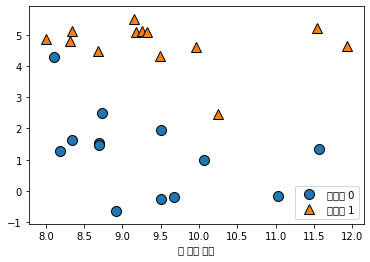

In [12]:
## 분류 예제에 사용할 데이터셋
## forge 데이터셋은 이진 분류를 위해 인위적으로 만든 두 개의 특성을 가진 데이터 셋
X, y = mglearn.datasets.make_forge()

## 산점도
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel('첫 번째 특성')

Text(0, 0.5, '타깃')

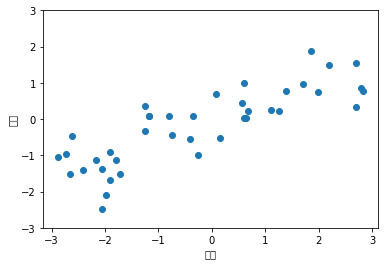

In [13]:
## 회귀 예제에 사용할 데이터셋
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타깃')

In [19]:
## 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋
## 분류 데이터
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [20]:
print('유방암 데이터의 형태:', cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [21]:
## np.bincount : numpy 배열 내부에 제공된 각 요소의 빈도를 얻는 데 사용되는 메서드
print('클래스별 샘플 개수:\n', {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [24]:
print('특성 이름:\n', cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [29]:
## 범죄율, 찰스강 인접도 등으로 보스턴 주변 주택 평균 가격 예측하는 보스턴 주택가격 데이터
## 회귀용 데이터
boston = load_boston()
print('데이터의 형태:',boston.data.shape)

데이터의 형태: (506, 13)


In [32]:
## boston 데이터에서 확장한? 추가적으로 특성을 유도해낸 데이터 셋 (특성 공학)
## 이후 4장에서 자세하게 다룬다.
X, y = mglearn.datasets.load_extended_boston()
print(f'X.shape: {X.shape}')

X.shape: (506, 104)


### k-최근접 이웃

가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용한다.

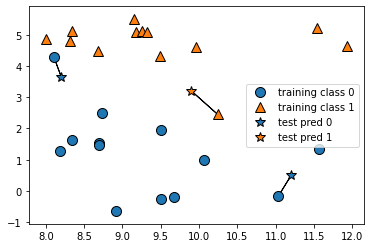

In [33]:
## 데이터 포인트 3개를 추가하고 가까운 이웃 1개에 따라 레이블을 정한 그림
mglearn.plots.plot_knn_classification(n_neighbors=1)

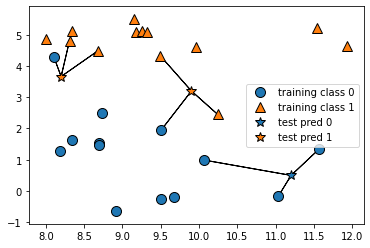

In [34]:
## 데이터 포인트 3개를 추가하고 가까운 이웃 3개에 따라 레이블을 정한 그림
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [37]:
## sklearn을 사용해서 k-최근접 이웃 알고리즘 적용
X, y = mglearn.datasets.make_forge()

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
clf =  KNeighborsClassifier(n_neighbors=3)

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
print(f'테스트 세트 예측: {clf.predict(x_test)}')

테스트 세트 예측: [1 0 1 0 1 0 0]


In [41]:
print(f'테스트 세트 정확도: {clf.score(x_test, y_test):0.2f}')

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분석

- 2차원 데이터 셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그려볼 수 있다.

- 그리고 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하면 알고리즘이
클래스 0과 1로 지정한 영역에서 나뉘는 결정 경계를 볼 수 있다.

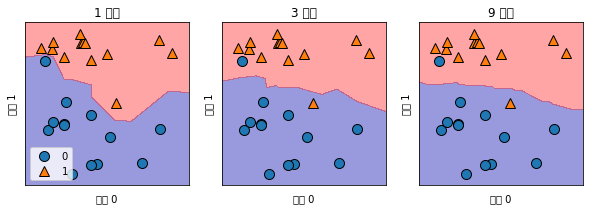

In [45]:
## subplots 메서드에 행, 열, 크기 순서로 입력
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    ## 2차원 데이터셋 분할 평면 그리는 메서드 / 모델, train데이터, 평면칠하기 등 파라미터 들어간다
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend(loc=3)

### 위의 그림 해석

- 이웃을 적게 사용 -> 모델의 복잡도가 높아진다

- 이웃을 많이 사용 -> 모델의 복잡도가 낮아진다

의문점. 이웃을 많이 사용하면 많은 데이터로 판별하기 때문에 복잡도가 높아지는 것 아닌가?
- 오히려 이상값으로 다른 클래스에 영역에 있지만 이것까지도 라벨링된대로 분류하려 하기 때문에 데이터에 대해 모델이 과대적합 될 수 있다. 과대적합 될 경우 복잡도가 높아진다. 

- 이웃을 여러 개 쓰면 클래스 0이더라도 주변에 1이 많은 경우 1로 판단하기에 결정경계가 완만해진다. 따라서 과대적합이 해소되어 모델의 복잡도가 낮아진다. 
- 하지만 너무 많은 이웃을 사용할 경우 (ex.전체) 가장 많은 클래스로 모두 분류되므로 과소적합의 우려가 있다. 따라서 적절한 이웃의 수를 정하는 것이 중요하다! 

---

#### 모델의 복잡도와 일반화 사이의 관계 입증

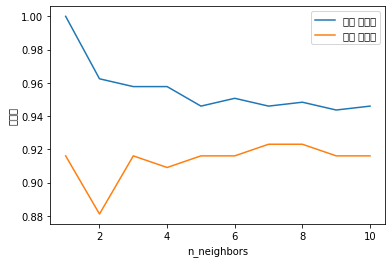

In [50]:
cancer = load_breast_cancer()

## target 데이터의 클래스간 비율이 일정하지 않아 한쪽에 편향되지 않도록 stratify를 넣어준다.
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(x_train, y_train))
    
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(x_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='훈련 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

#### 위의 그래프 해석

- 위의 그래프는 n_neighbors의 변화에 따른 훈련 세트와 테스트 세트에 대한 모델의 정확도를 보여준다. 

- n_neighbors이 낮을 때 훈련 세트의 정확도가 높고 테스트 세트의 정확도가 낮은 것을 보아 모델이 복잡하여 과대적합 되었다는 위의 결정경계 그래프 해석과 동일한 결과를 얻을 수 있었다.

- 마찬가지로 n_neighbors가 높아질수록 복잡도가 감소하여 경계가 완만해지고 과소적합 되어 훈련 세트에 대한 정확도가 감소했다.

- 또한 n_neighbors를 10개까지 증가시킬 경우 모델이 너무 단순해져 정확도가 감소하는 것을 확인할 수 있었으며 

- 중간 정도인 6번째가 정확도가 가장 좋은 것을 보아 결정경계 해석에서 언급했던 적절한 n_neighbors의 수 선정이 반드시 필요함을 입증할 수 있었다.